In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Use the data filled independent variables by Knn
df = pd.read_csv('/content/drive/My Drive/MLPS_final_project/data/covid_data_x_filled.csv')
df['geo_value'] = df['geo_value'].astype('category')

In [ ]:
df.isnull().sum()

,0
time_value,0
geo_value,0
smoothed_wspent_time_1d,0
smoothed_wtested_14d,0
smoothed_wpublic_transit_1d,0
smoothed_wworried_become_ill,0
smoothed_wvaccine_likely_govt_health,0
smoothed_wshop_1d,0
smoothed_wtested_positive_14d,21632
smoothed_wwork_outside_home_1d,0


In [ ]:
df.columns

Index(['time_value', 'geo_value', 'smoothed_wspent_time_1d',
       'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d',
       'smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health',
       'smoothed_wshop_1d', 'smoothed_wtested_positive_14d',
       'smoothed_wwork_outside_home_1d', 'smoothed_wothers_masked',
       'smoothed_wcli', 'smoothed_wcovid_vaccinated',
       'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d',
       'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who',
       'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
time_value,0
geo_value,0
smoothed_wspent_time_1d,0
smoothed_wtested_14d,0
smoothed_wpublic_transit_1d,0
smoothed_wworried_become_ill,0
smoothed_wvaccine_likely_govt_health,0
smoothed_wshop_1d,0
smoothed_wtested_positive_14d,21632
smoothed_wwork_outside_home_1d,0


### 1. data processing

In [ ]:
# time transform:
df['time_value'] = pd.to_datetime(df['time_value'])
df['year'] = df['time_value'].dt.year
df['month'] = df['time_value'].dt.month
df['day'] = df['time_value'].dt.day
df['weekday'] = df['time_value'].dt.weekday
# df.drop(columns=['time_value'], inplace=True)

In [ ]:
# used data, remove smoothed_wvaccine_likely_govt_health and smoothed_wothers_masked due to Collinearity
df = df.drop(['smoothed_wvaccine_likely_govt_health','smoothed_wothers_masked'], axis=1)

In [ ]:
df.columns

Index(['time_value', 'geo_value', 'smoothed_wspent_time_1d',
       'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d',
       'smoothed_wworried_become_ill', 'smoothed_wshop_1d',
       'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d',
       'smoothed_wcli', 'smoothed_wcovid_vaccinated',
       'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d',
       'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who',
       'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d', 'year', 'month',
       'day', 'weekday'],
      dtype='object')

## 1) target variable: smoothed_wtested_positive_14d

In [ ]:
# target variable: smoothed wtested positive 14d
df1_raw = df[[#'time_value',
       'geo_value', 'smoothed_wspent_time_1d',
       'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d',
       'smoothed_wworried_become_ill', 'smoothed_wshop_1d',
       'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d',
       'smoothed_wcli', #'smoothed_wcovid_vaccinated',
       'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d',
       'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who',
       'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d', 'year', 'month',
       'day', 'weekday']]



In [ ]:
df1 = df1_raw.copy()

### 2. data split: missing & exist

In [ ]:
df1_real = df1[df1['smoothed_wtested_positive_14d'].notna()].copy()
df1_missing = df1[df1['smoothed_wtested_positive_14d'].isna()].copy()

### 3. Model Training & Evaluation

#### 3-1 Random Forest

In [ ]:
X = df1_real.drop(columns=['smoothed_wtested_positive_14d'])
y = df1_real['smoothed_wtested_positive_14d']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("RF")
print(f"mse: {mse}, mae: {mae}, r2: {r2}")

RF
mse: 11.498292599547534, mae: 2.3824661413541923, r2: 0.8057668551871395


#### 3-2 XGboost Training

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

y_pred_xg = xgb_model.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"XGboost")
print(f"MSE: {mse_xg}, MAE: {mae_xg}, R2: {r2_xg}")

XGboost
MSE: 10.36914932380563, MAE: 2.3640711250839517, R2: 0.7727265659381463


### 4. Predict pseudo-label

In [ ]:
X_missing = df1_missing.drop(columns=['smoothed_wtested_positive_14d'])
pseudo_labels = rf.predict(X_missing)
df1_missing['smoothed_wtested_positive_14d'] = pseudo_labels #rf
df1_missing['is_pseudo_covid_positive'] = 1
df1_real['is_pseudo_covid_positive'] = 0

In [ ]:
# xgb_pred_missing = xgb_model.predict(X_missing)
# df1_missing['target_xgb'] =xgb_pred_missing

In [ ]:
df1_pseudo = pd.concat([df1_real, df1_missing], ignore_index=True)

### 5. Evaluation for pseudo-label

#### check distribution between real data and proxy data

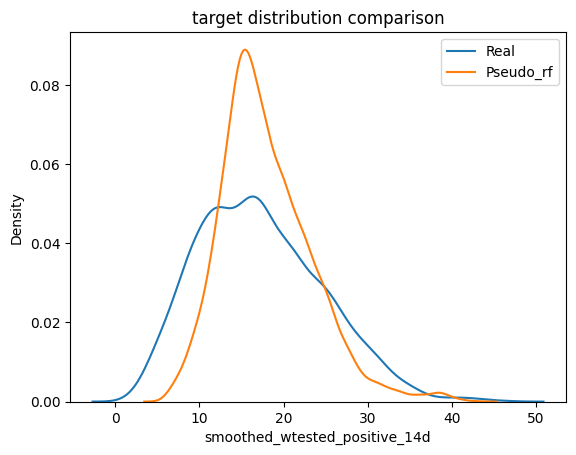

In [ ]:
sns.kdeplot(df1_real['smoothed_wtested_positive_14d'], label='Real')
sns.kdeplot(df1_missing['smoothed_wtested_positive_14d'], label='Pseudo_rf')
# sns.kdeplot(df1_missing['target_xgb'], label='Pseudo_xgb')
plt.title("target distribution comparison")
plt.legend()
plt.show()

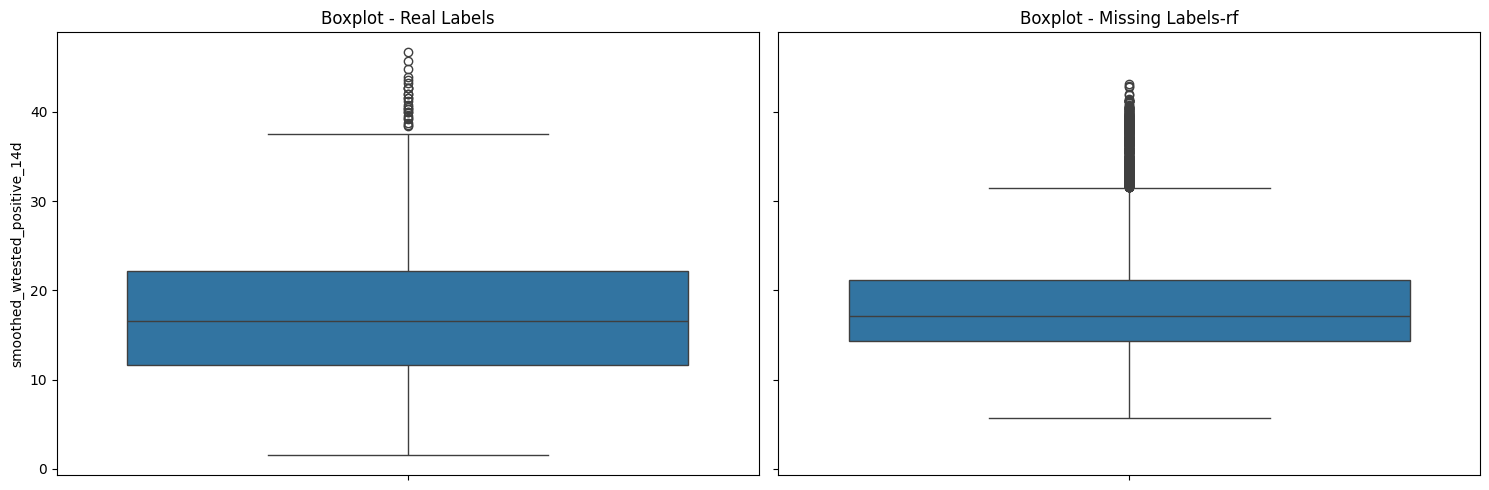

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  # sharey=True align y axis

# Real
sns.boxplot(ax=axes[0], data=df1_real, y='smoothed_wtested_positive_14d')
axes[0].set_title('Boxplot - Real Labels')

# Missing-rf
sns.boxplot(ax=axes[1], data=df1_missing, y='smoothed_wtested_positive_14d')
axes[1].set_title('Boxplot - Missing Labels-rf')

# Missing-xgb
# sns.boxplot(ax=axes[2], data=df1_missing, y='target_xgb')
# axes[2].set_title('Boxplot - Missing Labels-xgb')

plt.tight_layout()
plt.show()

## 2) target variable: smoothed_wcovid_vaccinated

In [ ]:
# target variable: smoothed_wcovid_vaccinated
df2_raw = df[[#'time_value',
       'geo_value', 'smoothed_wspent_time_1d',
       'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d',
       'smoothed_wworried_become_ill', 'smoothed_wshop_1d',#'smoothed_wtested_positive_14d',
       'smoothed_wwork_outside_home_1d',
       'smoothed_wcli', 'smoothed_wcovid_vaccinated',
       'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d',
       'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who',
       'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d', 'year', 'month',
       'day', 'weekday']]

### 1. data processing

In [ ]:
df2 = df2_raw.copy()

### 2. data split: missing & exist

In [ ]:
df2_real = df2[df2['smoothed_wcovid_vaccinated'].notna()].copy()
df2_missing = df2[df2['smoothed_wcovid_vaccinated'].isna()].copy()

### 3 Model Training & Evaluation

#### 3-1 Random Forest

In [ ]:
X = df2_real.drop(columns=['smoothed_wcovid_vaccinated'])
y = df2_real['smoothed_wcovid_vaccinated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf2 = RandomForestRegressor(n_estimators=50, random_state=42)
rf2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
y_pred = rf2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {mse}, mae: {mae}, r2: {r2}")

mse: 11.139078478790992, mae: 2.444214194856026, r2: 0.7553891463864694


#### 3-2 XGboost

In [ ]:
xgb_model2 = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model2.fit(X_train, y_train)

y_pred_xg2 = xgb_model2.predict(X_test)
mse_xg2 = mean_squared_error(y_test, y_pred_xg2)
mae_xg2 = mean_absolute_error(y_test, y_pred_xg2)
r2_xg2 = r2_score(y_test, y_pred_xg2)

print(f"XGboost")
print(f"MSE: {mse_xg2}, MAE: {mae_xg2}, R2: {r2_xg2}")

XGboost
MSE: 8.83643768702686, MAE: 2.324386597502065, R2: 0.8059544539845082


### 4. Predict pseudo-label

In [ ]:
X_missing = df2_missing.drop(columns=['smoothed_wcovid_vaccinated'])
pseudo_labels = rf2.predict(X_missing)
df2_missing['smoothed_wcovid_vaccinated'] = pseudo_labels #rf
df2_missing['is_pseudo_vaccinated'] = 1
df2_real['is_pseudo_vaccinated'] = 0

In [ ]:
df2_pseudo = pd.concat([df2_real, df2_missing], ignore_index=True)

### 5. Evaluation for pseudo-label

#### check distribution between real data and proxy data

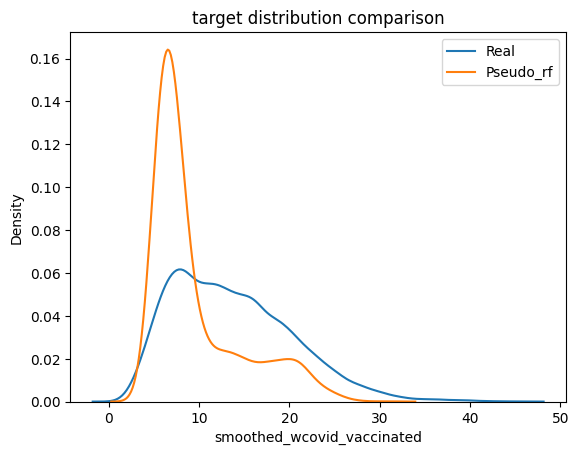

In [ ]:
sns.kdeplot(df2_real['smoothed_wcovid_vaccinated'], label='Real')
sns.kdeplot(df2_missing['smoothed_wcovid_vaccinated'], label='Pseudo_rf')
# sns.kdeplot(df2_missing['target_xgb'], label='Pseudo_xgb')

plt.title("target distribution comparison")
plt.legend()
plt.show()

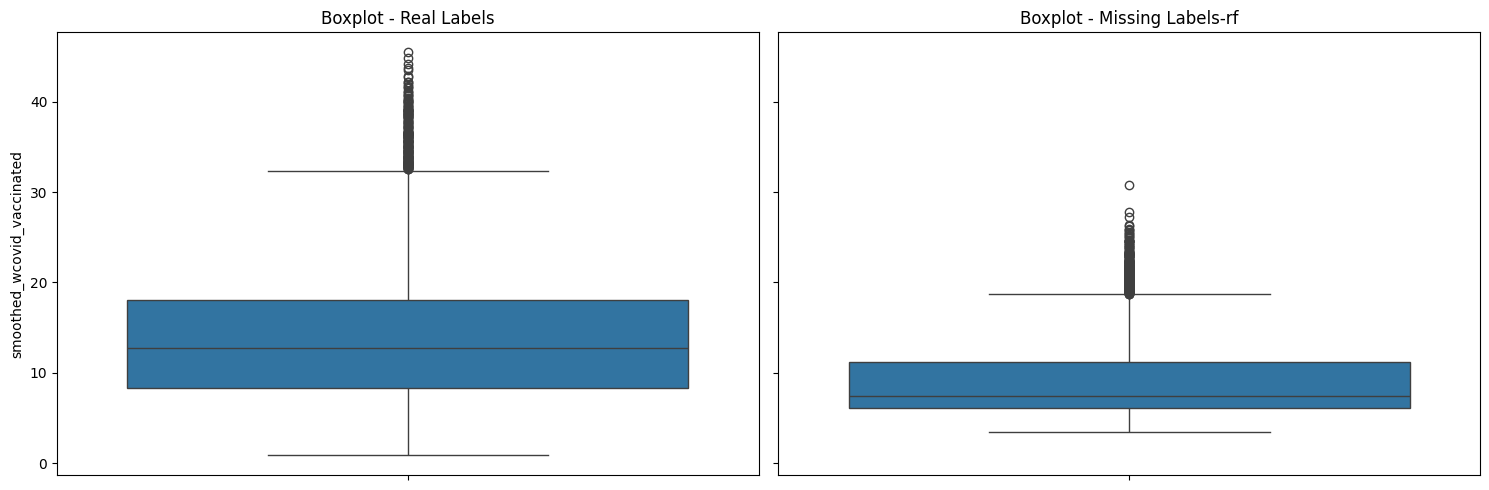

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  # sharey=True align y axis

# Real
sns.boxplot(ax=axes[0], data=df2_real, y='smoothed_wcovid_vaccinated')
axes[0].set_title('Boxplot - Real Labels')

# Missing-rf
sns.boxplot(ax=axes[1], data=df2_missing, y='smoothed_wcovid_vaccinated')
axes[1].set_title('Boxplot - Missing Labels-rf')

# Missing-xgb
# sns.boxplot(ax=axes[2], data=df2_missing, y='target_xgb')
# axes[2].set_title('Boxplot - Missing Labels-xgb')

plt.tight_layout()
plt.show()


# 3. Prepare dataset: Combine the data from 1) and 2)

In [ ]:
# Add back time_value column to df1_pseudo and df2_pseudo
df1_pseudo['time_value'] = pd.to_datetime(
    df1_pseudo['year'].astype(str) + '-' +
    df1_pseudo['month'].astype(str) + '-' +
    df1_pseudo['day'].astype(str)
)

df2_pseudo['time_value'] = pd.to_datetime(
    df2_pseudo['year'].astype(str) + '-' +
    df2_pseudo['month'].astype(str) + '-' +
    df2_pseudo['day'].astype(str)
)

df1 shape: (25626, 21)
df2 shape: (25626, 21)
df_combined shape: (25626, 40)
Compared to df1, added columns: {'day_x', 'weekday_y', 'year_y', 'smoothed_wwork_outside_home_1d_x', 'smoothed_wvaccine_likely_friends_y', 'year_x', 'smoothed_wvaccine_likely_who_x', 'smoothed_wvaccine_likely_politicians_x', 'smoothed_wwearing_mask_x', 'smoothed_wshop_1d_x', 'smoothed_wlarge_event_1d_y', 'smoothed_wpublic_transit_1d_y', 'smoothed_wvaccine_likely_friends_x', 'smoothed_wshop_1d_y', 'smoothed_wvaccine_likely_politicians_y', 'smoothed_wcovid_vaccinated', 'smoothed_wtested_14d_x', 'day_y', 'month_y', 'smoothed_wworried_become_ill_y', 'smoothed_wrestaurant_1d_x', 'weekday_x', 'smoothed_wworried_become_ill_x', 'smoothed_wwearing_mask_y', 'is_pseudo_vaccinated', 'smoothed_wlarge_event_1d_x', 'smoothed_wspent_time_1d_y', 'smoothed_wwork_outside_home_1d_y', 'smoothed_wpublic_transit_1d_x', 'month_x', 'smoothed_wcli_y', 'smoothed_wrestaurant_1d_y', 'smoothed_wspent_time_1d_x', 'smoothed_wvaccine_likely_w

In [ ]:
print(f"df1 shape: {df1_pseudo.shape}")
print(f"df2 shape: {df2_pseudo.shape}")
common_columns = list(set(df1_pseudo.columns).intersection(set(df2_pseudo.columns)))

# Remove is_pseudo columns from common_columns if they exist
if 'is_pseudo_covid_positive' in common_columns:
    common_columns.remove('is_pseudo_covid_positive')
if 'is_pseudo_vaccinated' in common_columns:
    common_columns.remove('is_pseudo_vaccinated')

# Merge the two dataframes
df_combined = pd.merge(df1_pseudo, df2_pseudo, on=common_columns, how='inner')
print(f"df_combined shape: {df_combined.shape}")
print(f"Compared to df1, added columns: {set(df_combined.columns)-set(df1_pseudo.columns)}")
print(f"Compared to df2, added columns: {set(df_combined.columns)-set(df2_pseudo.columns)}")


# Now reconstruct the time_value column from year, month, day components
df_combined['time_value'] = pd.to_datetime(
    df_combined['year'].astype(str) + '-' +
    df_combined['month'].astype(str) + '-' +
    df_combined['day'].astype(str)
)
print(df_combined.shape)


# Check if there are any remaining missing values in the key columns
print(f"Missing values in smoothed_wtested_positive_14d: {df_combined['smoothed_wtested_positive_14d'].isna().sum()}")
print(f"Missing values in smoothed_wcovid_vaccinated: {df_combined['smoothed_wcovid_vaccinated'].isna().sum()}")
print(f"Missing values in time_value: {df_combined['time_value'].isna().sum()}")

df1 shape: (25626, 21)
df2 shape: (25626, 21)
df_combined shape: (25626, 23)
Compared to df1, added columns: {'is_pseudo_vaccinated', 'smoothed_wcovid_vaccinated'}
Compared to df2, added columns: {'smoothed_wtested_positive_14d', 'is_pseudo_covid_positive'}
(25626, 23)
Missing values in smoothed_wtested_positive_14d: 0
Missing values in smoothed_wcovid_vaccinated: 0
Missing values in time_value: 0


In [ ]:
df_combined.head()

,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wcli,smoothed_wvaccine_likely_friends,...,smoothed_wwearing_mask,smoothed_wlarge_event_1d,year,month,day,weekday,is_pseudo_covid_positive,time_value,smoothed_wcovid_vaccinated,is_pseudo_vaccinated
0,1000.0,34.412959,12.541558,1.464798,65.771681,52.854667,29.288429,30.487852,3.244379,28.469582,...,84.311759,12.627098,2021,1,7,3,0,2021-01-07,2.638200,0
1,2000.0,31.031930,23.187988,5.247612,54.332976,52.948188,8.843686,31.242179,0.421245,29.240819,...,82.025101,9.231545,2021,1,7,3,0,2021-01-07,15.910167,0
2,4000.0,33.894471,15.813525,1.670934,70.449040,52.224064,30.302464,26.614385,1.401254,38.028305,...,87.570662,9.285851,2021,1,7,3,0,2021-01-07,4.715310,0
3,4013.0,30.674532,16.170044,3.106310,68.928567,50.983665,22.710935,24.467235,2.082898,34.448458,...,92.846578,9.364862,2021,1,7,3,0,2021-01-07,4.005679,0
4,4019.0,30.489939,16.193151,2.943076,69.579201,52.706816,21.912277,24.371077,1.306140,36.117471,...,93.671275,6.418342,2021,1,7,3,0,2021-01-07,6.249659,0


In [ ]:
df.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wcli,...,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,year,month,day,weekday
0,2021-01-07,1000.0,34.412959,12.541558,1.464798,65.771681,52.854667,29.288429,30.487852,3.244379,...,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098,2021,1,7,3
1,2021-01-07,1003.0,32.814153,10.189340,1.270183,61.516584,51.160278,NaN,28.384842,1.199572,...,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249,2021,1,7,3
2,2021-01-07,1015.0,35.621311,14.591271,6.594649,63.985917,54.503711,NaN,37.003522,3.890709,...,34.324152,20.974363,7.239400,28.105154,83.188551,13.255336,2021,1,7,3
3,2021-01-07,1051.0,40.453615,14.164503,3.320922,68.718538,54.948755,NaN,37.637900,3.284647,...,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318,2021,1,7,3
4,2021-01-07,1069.0,39.228766,10.103564,0.288897,59.961036,60.118290,NaN,36.156326,1.881970,...,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936,2021,1,7,3


In [ ]:
# check merge
df_duplicate_rows = pd.merge(df_combined.drop(columns=["is_pseudo_vaccinated","smoothed_wcovid_vaccinated","smoothed_wtested_positive_14d","is_pseudo_covid_positive"]),
                             df.drop(columns=["smoothed_wtested_positive_14d","smoothed_wcovid_vaccinated"]),
                             how='inner')

print(f"df_combined and df have {len(df_duplicate_rows)} same rows")

df_combined and df have 25626 same rows


### data combined
1. add bakc state and time_value
2. transform goe_value to state

In [ ]:
# transform geo into state level
fips_to_state = {
    "01": "Alabama", "02": "Alaska", "04": "Arizona", "05": "Arkansas", "06": "California",
    "08": "Colorado", "09": "Connecticut", "10": "Delaware", "11": "DC", "12": "Florida",
    "13": "Georgia", "15": "Hawaii", "16": "Idaho", "17": "Illinois", "18": "Indiana",
    "19": "Iowa", "20": "Kansas", "21": "Kentucky", "22": "Louisiana", "23": "Maine",
    "24": "Maryland", "25": "Massachusetts", "26": "Michigan", "27": "Minnesota", "28": "Mississippi",
    "29": "Missouri", "30": "Montana", "31": "Nebraska", "32": "Nevada", "33": "New Hampshire",
    "34": "New Jersey", "35": "New Mexico", "36": "New York", "37": "North Carolina", "38": "North Dakota",
    "39": "Ohio", "40": "Oklahoma", "41": "Oregon", "42": "Pennsylvania", "44": "Rhode Island",
    "45": "South Carolina", "46": "South Dakota", "47": "Tennessee", "48": "Texas", "49": "Utah",
    "50": "Vermont", "51": "Virginia", "53": "Washington", "54": "West Virginia", "55": "Wisconsin",
    "56": "Wyoming"
}

In [ ]:
df_combined['state_fips'] = df_combined['geo_value'].astype(int).astype(str).str.zfill(5).str[:2]
df_combined['state'] = df_combined['state_fips'].map(fips_to_state)

In [ ]:
df_combined.head()

,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wcli,smoothed_wvaccine_likely_friends,...,year,month,day,weekday,is_pseudo_covid_positive,time_value,smoothed_wcovid_vaccinated,is_pseudo_vaccinated,state_fips,state
0,1000.0,34.412959,12.541558,1.464798,65.771681,52.854667,29.288429,30.487852,3.244379,28.469582,...,2021,1,7,3,0,2021-01-07,2.638200,0,01,Alabama
1,2000.0,31.031930,23.187988,5.247612,54.332976,52.948188,8.843686,31.242179,0.421245,29.240819,...,2021,1,7,3,0,2021-01-07,15.910167,0,02,Alaska
2,4000.0,33.894471,15.813525,1.670934,70.449040,52.224064,30.302464,26.614385,1.401254,38.028305,...,2021,1,7,3,0,2021-01-07,4.715310,0,04,Arizona
3,4013.0,30.674532,16.170044,3.106310,68.928567,50.983665,22.710935,24.467235,2.082898,34.448458,...,2021,1,7,3,0,2021-01-07,4.005679,0,04,Arizona
4,4019.0,30.489939,16.193151,2.943076,69.579201,52.706816,21.912277,24.371077,1.306140,36.117471,...,2021,1,7,3,0,2021-01-07,6.249659,0,04,Arizona


In [ ]:
df_combined['is_pseudo_covid_positive'].value_counts()

,count
is_pseudo_covid_positive,
1,21632
0,3994


In [ ]:
df_combined['is_pseudo_vaccinated'].value_counts()

,count
is_pseudo_vaccinated,
0,23024
1,2602


In [ ]:
df_combined.dtypes

,0
geo_value,category
smoothed_wspent_time_1d,float64
smoothed_wtested_14d,float64
smoothed_wpublic_transit_1d,float64
smoothed_wworried_become_ill,float64
smoothed_wshop_1d,float64
smoothed_wtested_positive_14d,float64
smoothed_wwork_outside_home_1d,float64
smoothed_wcli,float64
smoothed_wvaccine_likely_friends,float64


In [ ]:
df_combined.to_csv('/content/drive/My Drive/MLPS_final_project/data/covid_fill_x_y.csv',
                   index=False)

In [ ]:
# state one-hot encoding
# df = pd.get_dummies(df, columns=['state'], drop_first=True)